In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from PIL import Image
import cv2
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import convolve
from matplotlib import colors
from scipy import interpolate
from scipy.interpolate import BSpline
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_lsq_spline
import os
from sklearn import preprocessing
from sklearn import preprocessing
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib.transforms import Bbox
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [13]:
error=0.0008
lower=485
upper=1200
Num=14
num=32
tt='reflect'
typ='cubic'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
albnum=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
alanum=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sionum=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,750,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
number=['0000','0100','0250','0500','0750']
label=['A','B','C']
total=[albnum,alanum,sionum,sionum,sionum,sianum,sibnum]
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3050')
number.append('3100')
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
dfys={}
dfxs={}
dfnan={}
RR=0
xzs=[0.154]
for x in xzs:
    yt=[]
    ytn=[]
    for k in ['AL-B','AL-A','SiO2-A','SiO2-B','SiO2-C','SiC-A','SiC-B']:
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    Tcx=[]
                    Tcy=[]
                    for column in df.index:
                        if column>(-error+x) and column<(x+error):
                            y=df.loc[column].values[0]
                            if k=='SiO2-A' or k=='SiO2-C':
                                y=y-0.009
                            elif k=='SiO2-B':
                                y=y-0.0115
                            elif k=='SiC-A' or k=='SiC-B':
                                y=y-0.00
                            else:
                                y=y-0
                            RR+=1
                            Tcx.append(column)
                            Tcy.append(y)
                            if RR==2:
                                RR=0
                                break
                    Newy=((Tcy[1]-Tcy[0])/(Tcx[1]-Tcx[0])*x+(Tcy[1]-((Tcy[1]-Tcy[0])*Tcx[1])/(Tcx[1]-Tcx[0])))
                    ys.append(Newy)
                except Exception as e:
                    #print('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #yns.append(np.nan)
                    #print('pass')
                    pass
            ytn.append(ys)
            yt.append(ys)
    dfys['EEL_Compoent_{}_Line_{}'.format(x,i)]=yt
    dfnan['EEL_Compoent_{}_Line_{}'.format(x,i)]=ytn
df3 = pd.DataFrame.from_dict(dfys, orient='index')
df2 = pd.DataFrame.from_dict(dfnan, orient='index')
stelement=['AlB','AlA','SiO2A','SiO2B','SiO2C','SiCA','SiCB']
z=0
whole={}
whole1={}
whole2={}

In [14]:
a,b=df2.shape
z=0
for row in range(0,a):
    co=0
    y=df2.iloc[row].values
    y1=df3.iloc[row].values
    #axes=fig.add_subplot(1,1,1)
    #fig= plt.figure(figsize=(9,4))
    for value,V in zip(y,y1):
        pos=np.array(total[co])-1550
        pos1=np.array(total[co])
        c=['c-']
        k=5
        X = pos
        t = [-1, 0,1]
        t = np.r_[(X[0],)*(k+1),t,(X[-1],)*(k+1)]
        spl = make_lsq_spline(X, value, t, k)
        #plt.plot(xp,spl(xnew),c,lw=3,label='K{}'.format(k))
        spl1 = make_lsq_spline(X, V, t, k)
        xnew=np.linspace(-1550,1550,num)
        #fig= plt.figure(figsize=(12,10))
        #axes=fig.add_subplot(1,1,1)
        co=co+1
        #display(len(value),len(pos),value)
        #f = Rbf(pos1,value,kind=typ)
        #f = interp1d(pos,value,kind=typ)
        #f = interpolate.interp1d(pos, value)
        #f=interpolate.Akima1DInterpolator(pos,value)
        #f=interpolate.CubicSpline(pos,value)
        #f=interpolate.BSpline(pos,value,1)
        #f=interpolate.make_interp_spline(pos,value)
        #plt.plot(Xp,value,'ro', ms=5,label='After Substraction')
        xp = np.linspace(0,3100,32)
        '''fig= plt.figure(figsize=(7.5,3.5))
        plt.plot(pos1,value,'ro', ms=6,label='Raw Data')
        plt.plot(xp,spl(xnew),'b-',lw=3,label='Interpolation_Bspline')
        #plt.plot(xp,f(xp),'g--',lw=3,label='Interpolation_RBF')
        plt.title('{}_{}eV_K{}'.format(stelement[z],xzs[row],k))
        plt.grid()
        plt.xticks(np.arange(0,3300,250))
        plt.yticks(np.arange(0,0.06,0.005))
        plt.legend()
        plt.savefig('Line_{}_{}_K{}.png'.format(stelement[z],xzs[row],k),bbox_inches='tight')'''
        #display(xzs[row],stelement[z])
        whole['EEL={}_line_{}'.format(xzs[row],stelement[z])]=spl1(xnew)
        whole1['EEL={}_line_{}'.format(xzs[row],stelement[z])]=spl(xnew)
        z+=1
        if z==len(stelement):
            z=0
#display(finaldf,whole)
finaldf1 =pd.DataFrame.from_dict(whole1, orient='index')
finaldf =pd.DataFrame.from_dict(whole, orient='index')
#finaldf1.to_csv('S{}.csv'.format(val))

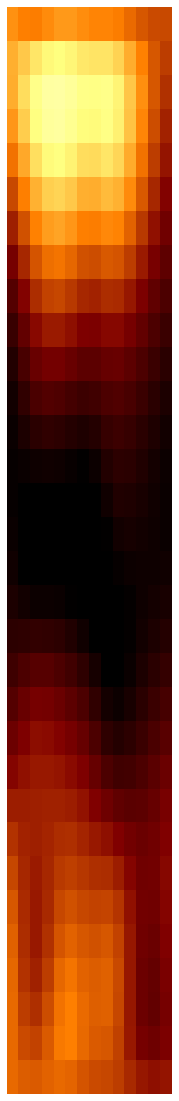

In [15]:
pos=np.array([0,10,30,40,50,70,80])
R,C=finaldf1.shape
for j in range(1,round(R/7)+1):
    subnew1={}
    subnew2={}
    '''fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)'''
    for i in range(1,C+1):
        qq=finaldf1.iloc[(j-1)*7:j*7,i-1:i].values.flatten()
        qq1=finaldf.iloc[(j-1)*7:j*7,i-1:i].values.flatten()
        #display(finaldf.iloc[:,i-1:i][:7])
        #plt.scatter(pos,qq)
        #display(len(pos),len(qq))
        X = pos-40
        xnew=np.linspace(0,80,Num)
        t = [-1, 0, 1]
        k = 3
        t = np.r_[(X[0],)*(k+1),t,(X[-1],)*(k+1)]
        spl = make_lsq_spline(X, qq, t, k)
        xs = np.linspace(-40, 40, Num)
        tp='cubic'
        Tp='linear'
        F = Rbf(pos,qq,kind=Tp)
        F1=Rbf(pos,qq1,kind=tp)
        #Fm = Rbf(pos,qq,kind=Tp)
        '''fig= plt.figure(figsize=(7,4))
        #plt.ylim(0,0.055)
        plt.plot(pos,qq,'rD',label='After Subs Vertical Interpo')
        plt.plot(pos,qq1,'mH',label='Raw')
        plt.plot(xnew, F(xnew), 'b-', lw=3, label='After Subs',alpha=0.8)
        plt.plot(xnew, F1(xnew), 'g-', lw=3, label='Raw Interpol',alpha=0.8)
        #plt.plot(xnew, Fm(xnew), 'g-', lw=3, label=Tp,alpha=0.7)
        plt.legend(loc='best')
        plt.title('{}eV_{}nm'.format(xzs[0],(i-1)*100))
        plt.savefig('R0.133B{}_L{}.png'.format(k,i),bboc_inches='tight')'''
        #F = Rbf(pos,qq,kind=typ)
        #F=interpolate.PchipInterpolator(pos,qq)
        '''plt.plot(xnew,Xs,label='K3spline')
        plt.plot(pos, qq, 'ro', ms=5,label='Raw Data')
        plt.legend(loc='best')
        plt.savefig('K3_L{}.png'.format(i),bbox_inches='tight')'''
        subnew1['{}'.format(i)]=F(xnew)
        subnew2['{}'.format(i)]=F1(xnew)
        #subnew['{}'.format(i)]=RGB
        #print(convolve(F(xnew),mean,mode=tt))
    dff=DataFrame(subnew1)
    dff1=DataFrame(subnew2)*(xzs[j-1])**0.5*4.5/0.1
    #dff1=dff1/max(dff1.values[0].flatten())
    #dff=dff/max(dff.values[0].flatten())
    #dff.to_csv('After_A{}_EEL={}.csv'.format(typ,xzs[j-1]))
    #display(df,len(df.columns),len(df.index))
    dy=np.linspace(0,3100,Num)
    ''' three=plt.figure(figsize=(60,60)).gca(projection='3d')
    for ll in range(0,num):
        #display(len(dff.index),len(dff.iloc[11]))
        three.scatter(dff.index,dy,dff.iloc[ll], alpha=0.8)
        three.set_xlabel('Lines',fontsize=100)
        three.set_ylabel('Columns',fontsize=100)
        three.set_zlabel('Intensity',fontsize=100)
        three.set_zticks(np.linspace(0,0.06))'''
    '''three.plot_surface(dff.index,dy,dff.values,cmap='tab20c')
    three.set_xlabel('Lines',fontsize=100)
    three.set_ylabel('Columns',fontsize=100)
    three.set_zlabel('Intensity',fontsize=100)'''
    #plt.title('EEL={}_A{}_alog{}_S_{}'.format(xzs[j-1],angle,typ,val),fontsize=100)
    #three.view_init(elev=10, azim=angle)
    '''%time r=dfr.values.tolist()
    %time im = np.array(r, dtype=np.uint8)
    %time plt.imshow(im)'''
    #plt.savefig('EEL={}_A{}_alog{}_S_{}.png'.format(xzs[j-1],angle,typ,val),bbox_inches='tight')
    #plt.axis('off')
    #%time plt.savefig('AASecEEL={}.png'.format(xzs[j-1]),bbox_inches='tight',dpi=800)
    #plt.plot(xnew,f(xnew))
    #df=DataFrame(new)
    #display(df)
    #dfr.to_csv('fter_A{}_EEL={}.csv'.format(typ,xzs[0]))
    fig= plt.figure(figsize=(2.95,20))
    ax = fig.add_subplot(1,1,1)
    #dff.to_csv('After_A{}_EEL={}.csv'.format(typ,xzs[0]))
    yy=dff.index
    #img=plt.contourf(yy,dy,dff.transpose().values,cmap='hot')
    #plt.imshow(dff.transpose().values,cmap='hot')
    img=plt.pcolor(dff1.transpose().values,cmap='afmhot',vmin=0,vmax=1)
    plt.axis('off')
    '''fontprops = fm.FontProperties(size=13)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="17%", pad=0.19)
    cbar=plt.colorbar(img, cax=cax)
    cbar.set_ticks([0,1])'''
    textstr='{} meV'.format("%.0f" % (xzs[j-1]*1000))
    '''norm = colors.Normalize(vmin=-0.001, vmax=0.07)
    img.set_norm(norm)'''
    #plt.title('WithoutRawDataInterEEL={}'.format(xzs[j-1]))
    '''textstr='EEls={}'.format("%.3f" % xzs[j-1])
    plt.text(1, 0.5, textstr, fontsize=20, transform=plt.gcf().transFigure)'''
    '''plt.text(0.23, 0.098, textstr, fontsize=20, transform=plt.gcf().transFigure)
    plt.text(-0.25, 0.5, '   ', fontsize=15, transform=plt.gcf().transFigure)
    plt.text(1.2, 0.5, '  ', fontsize=15, transform=plt.gcf().transFigure)'''
    plt.savefig('Interpo{}.png'.format("%.3f" % xzs[j-1]),bbox_inches='tight')

In [20]:
import cv2
import numpy as np
import glob
R,C=finaldf1.shape
img_array = []
font= cv2.FONT_HERSHEY_SIMPLEX 
for i in range(1,round(R/7)+1):
    for filename in glob.glob('Interpo{}.png'.format("%.3f" % xzs[i-1])):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
out = cv2.VideoWriter('I450_65x245_FR=13.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 13, size)
display(len(img_array))
for j in range(len(img_array)):
    out.write(img_array[j])
out.release()

450

In [14]:
14*32

448